In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
df = pd.read_csv('co2.csv')

In [7]:
X = df[['engine']]
y = df['out1']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [10]:
print("slope: ", model.coef_[0])
print("intercept: ", model.intercept_)


slope:  39.060288236077135
intercept:  128.0341192957158


In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error: ", rmse)


Root Mean Squared Error:  32.25604053354134


In [17]:
comparison = pd.DataFrame({
    'Engine': X_test['engine'].values,
    'Co2 real':y_test.values,
    'Co2 predicted': y_pred.round(2)
})
print(comparison)

    Engine  Co2 real  Co2 predicted
0      5.4       368         338.96
1      6.0       380         362.40
2      6.2       402         370.21
3      2.4       218         221.78
4      4.4       292         299.90
..     ...       ...            ...
95     4.6       386         307.71
96     3.0       221         245.21
97     6.8       437         393.64
98     5.3       344         335.05
99     4.7       338         311.62

[100 rows x 3 columns]


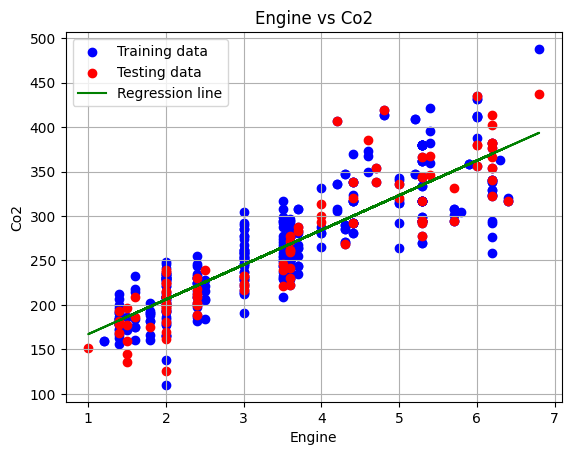

In [21]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_test, y_pred, color='green', label='Regression line')
plt.xlabel('Engine')
plt.title('Engine vs Co2')
plt.grid(True)
plt.ylabel('Co2')
plt.legend()
plt.show()

In [22]:
new_engine = [[2.8]]
predicted_co2 = model.predict(new_engine)
print("Predicted Co2 for new engine: ", predicted_co2[0])

Predicted Co2 for new engine:  237.40292635673177


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
